In [1]:
def sgd_momentum(parameters,vs,lr,gamma):
    for param,v in zip(parameters,vs):
        v[:]=gamma*v+lr*param.grad.data
        param.data=param.data-v

In [2]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

def data_tf(x):
    x=np.array(x,dtype='float32')/255
    x=(x-0.5)/0.5
    x=x.reshape((-1,))
    return x

train_set=MNIST('./data',train=True,transform=data_tf,download=True)
test_set=MNIST('./data',train=False,transform=data_tf,download=True)
    
criterion=nn.CrossEntropyLoss()

In [4]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)
vs=[]
for param in net.parameters():
    vs.append(torch.zeros_like(param.data))
    
losses=[]

start=time.time()
for e in range(5):
    train_loss=0
    for im,label in train_data:
        im=Variable(im)
        label=Variable(label)
        out=net(im)
        loss=criterion(out,label)
        net.zero_grad()
        loss.backward()
        sgd_momentum(net.parameters(),vs,1e-2,0.9)
        train_loss+=loss.data
        losses.append(loss.data)
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))    

epoch: 0, Train Loss: 0.364770
epoch: 1, Train Loss: 0.171202
epoch: 2, Train Loss: 0.127816
epoch: 3, Train Loss: 0.097511
epoch: 4, Train Loss: 0.082469
使用时间: 55.79313 s


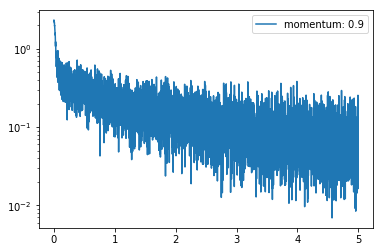

In [5]:
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum: 0.9')
plt.legend(loc='best')

In [7]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.9) # 加动量
# 开始训练
losses = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.data
        if idx % 30 == 0: # 30 步记录一次
            losses.append(loss.data)
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.364851
epoch: 1, Train Loss: 0.171263
epoch: 2, Train Loss: 0.122884
epoch: 3, Train Loss: 0.096979
epoch: 4, Train Loss: 0.082428
使用时间: 46.43898 s


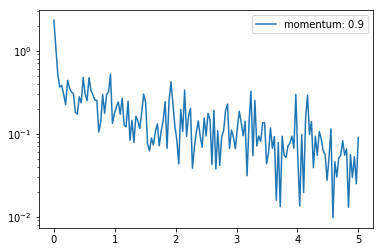

In [8]:
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum: 0.9')
plt.legend(loc='best')

In [9]:
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.SGD(net.parameters(), lr=1e-2) # 不加动量
# 开始训练
losses1 = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.data
        if idx % 30 == 0: # 30 步记录一次
            losses1.append(loss.data)
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.739388
epoch: 1, Train Loss: 0.365447
epoch: 2, Train Loss: 0.317836
epoch: 3, Train Loss: 0.289464
epoch: 4, Train Loss: 0.266288
使用时间: 42.69293 s


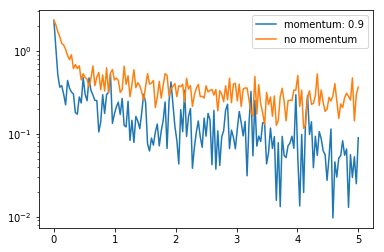

In [10]:
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum: 0.9')
plt.semilogy(x_axis, losses1, label='no momentum')
plt.legend(loc='best')